# Tap Into Your Tastes: A Beer Recommendation System

Author: Sean Conlon

Performed using multiple machine learning models and filtering techniques to accurately predict the overall rating of a beer. The Focus of this project is to create a well-established recommendation system that can predict a user's preferences using review data as well as beer data.

# Introduction
 This project was created through a culmination of the skills I have learned in the Data Science program at Flatiron School. Using datasets from the links provided I discovered a dataset containing breweries across the United States as well as a dataset containing over 1.5 million reviews of beers. I merged the two datasets together creating a beer_df as df_top50. This was then used to create a beer recommender system using multiple machine learning models and filtering techniques. The resulting dataset withheld approximately 160,000 reviews.

 The analysis that was taken was to create models that will accurately give recommendations based on user ratings as well as other factors of beer. 

## Business Understanding
The overall goal of this project is to help businesses especially those within the beer industry to thrive. 

There are multiple sources that state that nearly 50% of all breweries made ultimately fail. This is due to a lack of understanding of the market as well as their consumers. In order for breweries to take intiative from their consumers, those who are new and returning, they can use this recommendation system to help them understand what their consumers are looking for. 

It will help not only the breweries with their marketing but also the consumers with their beer choices, but also suggest new beers to consumers that they may not have tried before.

## Data Understanding
The data used for this project was obtained from the following sources:

https://www.kaggle.com/code/stansilas/mapping-brewery-pubs-across-us-states/input 

https://www.kaggle.com/datasets/thedevastator/1-5-million-beer-reviews-from-beer-advocate 

These datasets were merged together to create a beer dataframe, which contained a few important columns that were used for the analysis. Such as:

* lat - latitude of brewery location 

* long - longitude of brewery location

* brewery_name - the name of the brewery

* province - state the brewery is located in

* beer_name - the name of the beer

* beer_style - the type of beer, such as IPA, Stout, etc.

* beer_abv - the alcohol by volume of the beer

* review_overall - the overall rating of the beer by the user

* review_aroma - the aroma rating of the beer by the user

* review_appearance - the appearance rating of the beer by the user

* review_palate - the palates rating of the beer by the user, such as the mouthfeel of the beer

* review_taste - the taste rating of the beer by the user

I was able to then move on to preparing the data for analysis and modeling. The final dataset contained over 160,000 reviews of beers.

# Data Preparation 

While preparing the data, I had to make sure that the data was clean and ready for analysis. I had to make sure that there were no null values in the data. I also had to make sure that the data was in the correct format for the analysis to perform at its best. 


In [1]:
# read in the data from first csv file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('data/7160_1.csv')

In [2]:
# change name of column name to brewery_name
df.rename(columns={'name':'brewery_name'}, inplace=True)
df.head()

address                                         categories  \
0            407 Radam Ln                                            brewery   
1  1135 N W Galveston Ave                                    Brewery and Bar   
2        830 W Bannock St  brewery, Restaurant, Pub, Brewery, pub, Brewer...   
3          1022 Texan Trl  Wine Tours & Tastings, Food & Drink, Tours, Br...   
4              Po Box 135  American Restaurants, Bar & Grill Restaurants,...   

        city country                            key        lat        long  \
0     Austin      US        us/tx/austin/407radamln        NaN         NaN   
1       Bend      US  us/or/bend/1135nwgalvestonave        NaN         NaN   
2      Boise      US      us/id/boise/830wbannockst  43.617711 -116.202883   
3  Grapevine      US   us/tx/grapevine/1022texantrl  32.938385  -97.064340   
4    Villard      US         us/mn/villard/pobox135        NaN         NaN   

                                      brewery_name  \
0                                 (512) Brewing Co   
1  10 Barrel Brewing Company, 10 Barrel Brewing Co   
2         10 Barrel Brewing, 10 Barrel Brewing Co.   
3                                  10 Gallon Tours   
4                                   10 Mile Tavern   

                                     phones postalCode province  \
0                                5127072337      78745       TX   
1                (541) 585-1007, 5415851007      97703       OR   
2  (208) 344-5870, 2083445870, 2.08344587E9      83702       ID   
3                 18174031832, 817 403-1832      76051       TX   
4                                3205542939      56385       MN   

                        websites  
0                            NaN  
1                   10barrel.com  
2                   10barrel.com  
3  http://www.10gallontours.com/  
4    http://www.10miletavern.com

In [3]:
# read in the data from the second csv file
df_reviews = pd.read_csv('data/beer_reviews.csv')
df_reviews.head()

index  brewery_id             brewery_name  review_time  review_overall  \
0      0       10325          Vecchio Birraio   1234817823             1.5   
1      1       10325          Vecchio Birraio   1235915097             3.0   
2      2       10325          Vecchio Birraio   1235916604             3.0   
3      3       10325          Vecchio Birraio   1234725145             3.0   
4      4        1075  Caldera Brewing Company   1293735206             4.0   

   review_aroma  review_appearance review_profilename  \
0           2.0                2.5            stcules   
1           2.5                3.0            stcules   
2           2.5                3.0            stcules   
3           3.0                3.5            stcules   
4           4.5                4.0     johnmichaelsen   

                       beer_style  review_palate  review_taste  \
0                      Hefeweizen            1.5           1.5   
1              English Strong Ale            3.0           3.0   
2          Foreign / Export Stout            3.0           3.0   
3                 German Pilsener            2.5           3.0   
4  American Double / Imperial IPA            4.0           4.5   

                beer_name  beer_abv  beer_beerid  
0            Sausa Weizen       5.0        47986  
1                Red Moon       6.2        48213  
2  Black Horse Black Beer       6.5        48215  
3              Sausa Pils       5.0        47969  
4           Cauldron DIPA       7.7        64883

#### Merging the two datasets together

In [4]:
# inner join two dataframes on brewery_name
df_merged = pd.merge(df, df_reviews, on='brewery_name', how='inner')
df_merged.head()


address categories         city country  \
0  2010 Williams St    Brewery  San Leandro      US   
1  2010 Williams St    Brewery  San Leandro      US   
2  2010 Williams St    Brewery  San Leandro      US   
3  2010 Williams St    Brewery  San Leandro      US   
4  2010 Williams St    Brewery  San Leandro      US   

                               key        lat        long  \
0  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   
1  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   
2  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   
3  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   
4  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   

             brewery_name      phones postalCode  ... review_overall  \
0  21st Amendment Brewery  5105952111      94577  ...            4.5   
1  21st Amendment Brewery  5105952111      94577  ...            3.5   
2  21st Amendment Brewery  5105952111      94577  ...            4.0   
3  21st Amendment Brewery  5105952111      94577  ...            4.0   
4  21st Amendment Brewery  5105952111      94577  ...            4.0   

  review_aroma  review_appearance  review_profilename  \
0          4.0                5.0                jool   
1          3.5                4.0           illidurit   
2          4.0                4.0        magictrokini   
3          4.0                3.5      HapWifeHapLife   
4          3.5                4.5            pwoody11   

                       beer_style  review_palate  review_taste  \
0                    American IPA            4.5           4.5   
1  American Double / Imperial IPA            3.5           3.5   
2                    American IPA            3.0           4.0   
3                    American IPA            4.0           4.0   
4         Belgian Strong Dark Ale            4.0           4.0   

            beer_name beer_abv beer_beerid  
0            Hop Caen      7.0        4205  
1             21 Rock      9.7       66190  
2        Harvest Moon      6.4       45648  
3  21st Amendment IPA      7.0       20781  
4        Monk's Blood      8.3       52510  

[5 rows x 25 columns]

In [5]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260515 entries, 0 to 260514
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   address             260515 non-null  object 
 1   categories          260515 non-null  object 
 2   city                260515 non-null  object 
 3   country             260515 non-null  object 
 4   key                 260515 non-null  object 
 5   lat                 242757 non-null  float64
 6   long                242757 non-null  float64
 7   brewery_name        260515 non-null  object 
 8   phones              238035 non-null  object 
 9   postalCode          255874 non-null  object 
 10  province            260515 non-null  object 
 11  websites            205413 non-null  object 
 12  index               260515 non-null  int64  
 13  brewery_id          260515 non-null  int64  
 14  review_time         260515 non-null  int64  
 15  review_overall      260515 non-nul

#### Upon merging both datasets, we can see there are alot of random null values within the dataset. We will need to clean this up before we can do any analysis.

In [6]:
df_merged.head()

address categories         city country  \
0  2010 Williams St    Brewery  San Leandro      US   
1  2010 Williams St    Brewery  San Leandro      US   
2  2010 Williams St    Brewery  San Leandro      US   
3  2010 Williams St    Brewery  San Leandro      US   
4  2010 Williams St    Brewery  San Leandro      US   

                               key        lat        long  \
0  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   
1  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   
2  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   
3  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   
4  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   

             brewery_name      phones postalCode  ... review_overall  \
0  21st Amendment Brewery  5105952111      94577  ...            4.5   
1  21st Amendment Brewery  5105952111      94577  ...            3.5   
2  21st Amendment Brewery  5105952111      94577  ...            4.0   
3  21st Amendment Brewery  5105952111      94577  ...            4.0   
4  21st Amendment Brewery  5105952111      94577  ...            4.0   

  review_aroma  review_appearance  review_profilename  \
0          4.0                5.0                jool   
1          3.5                4.0           illidurit   
2          4.0                4.0        magictrokini   
3          4.0                3.5      HapWifeHapLife   
4          3.5                4.5            pwoody11   

                       beer_style  review_palate  review_taste  \
0                    American IPA            4.5           4.5   
1  American Double / Imperial IPA            3.5           3.5   
2                    American IPA            3.0           4.0   
3                    American IPA            4.0           4.0   
4         Belgian Strong Dark Ale            4.0           4.0   

            beer_name beer_abv beer_beerid  
0            Hop Caen      7.0        4205  
1             21 Rock      9.7       66190  
2        Harvest Moon      6.4       45648  
3  21st Amendment IPA      7.0       20781  
4        Monk's Blood      8.3       52510  

[5 rows x 25 columns]

#### Because of the large amount of data, I decided to only use the top 50 breweries in the dataset, this was to cut down on the number of super users as well as help the analysis and accuracy of the models.

In [7]:
# make new dataframe with only the top 50 breweries
df_top50 = df_merged[df_merged['brewery_name'].isin(df_merged['brewery_name'].value_counts().head(50).index)]
df_top50.head()


address categories         city country  \
0  2010 Williams St    Brewery  San Leandro      US   
1  2010 Williams St    Brewery  San Leandro      US   
2  2010 Williams St    Brewery  San Leandro      US   
3  2010 Williams St    Brewery  San Leandro      US   
4  2010 Williams St    Brewery  San Leandro      US   

                               key        lat        long  \
0  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   
1  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   
2  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   
3  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   
4  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   

             brewery_name      phones postalCode  ... review_overall  \
0  21st Amendment Brewery  5105952111      94577  ...            4.5   
1  21st Amendment Brewery  5105952111      94577  ...            3.5   
2  21st Amendment Brewery  5105952111      94577  ...            4.0   
3  21st Amendment Brewery  5105952111      94577  ...            4.0   
4  21st Amendment Brewery  5105952111      94577  ...            4.0   

  review_aroma  review_appearance  review_profilename  \
0          4.0                5.0                jool   
1          3.5                4.0           illidurit   
2          4.0                4.0        magictrokini   
3          4.0                3.5      HapWifeHapLife   
4          3.5                4.5            pwoody11   

                       beer_style  review_palate  review_taste  \
0                    American IPA            4.5           4.5   
1  American Double / Imperial IPA            3.5           3.5   
2                    American IPA            3.0           4.0   
3                    American IPA            4.0           4.0   
4         Belgian Strong Dark Ale            4.0           4.0   

            beer_name beer_abv beer_beerid  
0            Hop Caen      7.0        4205  
1             21 Rock      9.7       66190  
2        Harvest Moon      6.4       45648  
3  21st Amendment IPA      7.0       20781  
4        Monk's Blood      8.3       52510  

[5 rows x 25 columns]

In [8]:
df_top50.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223810 entries, 0 to 260514
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   address             223810 non-null  object 
 1   categories          223810 non-null  object 
 2   city                223810 non-null  object 
 3   country             223810 non-null  object 
 4   key                 223810 non-null  object 
 5   lat                 215057 non-null  float64
 6   long                215057 non-null  float64
 7   brewery_name        223810 non-null  object 
 8   phones              203450 non-null  object 
 9   postalCode          219870 non-null  object 
 10  province            223810 non-null  object 
 11  websites            175916 non-null  object 
 12  index               223810 non-null  int64  
 13  brewery_id          223810 non-null  int64  
 14  review_time         223810 non-null  int64  
 15  review_overall      223810 non-nul

#### Even only using the top 50 breweries, we are still left with a large amount of data and there are still some null values to be addressed.

In [9]:
# keep all rows that contain values in lat and long columns
df_top50 = df_top50[df_top50['lat'].notna()]
df_top50 = df_top50[df_top50['long'].notna()]
df_top50.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215057 entries, 0 to 260514
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   address             215057 non-null  object 
 1   categories          215057 non-null  object 
 2   city                215057 non-null  object 
 3   country             215057 non-null  object 
 4   key                 215057 non-null  object 
 5   lat                 215057 non-null  float64
 6   long                215057 non-null  float64
 7   brewery_name        215057 non-null  object 
 8   phones              196189 non-null  object 
 9   postalCode          215057 non-null  object 
 10  province            215057 non-null  object 
 11  websites            171103 non-null  object 
 12  index               215057 non-null  int64  
 13  brewery_id          215057 non-null  int64  
 14  review_time         215057 non-null  int64  
 15  review_overall      215057 non-nul

#### I decided to prioritize the rows that contained lat and long columns as I wanted to use these columns for the location-based model. 

In [10]:
# keep all rows that contain values in phones and website columns
df_top50 = df_top50[df_top50['phones'].notna()]
df_top50 = df_top50[df_top50['websites'].notna()]
df_top50.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 171103 entries, 0 to 257916
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   address             171103 non-null  object 
 1   categories          171103 non-null  object 
 2   city                171103 non-null  object 
 3   country             171103 non-null  object 
 4   key                 171103 non-null  object 
 5   lat                 171103 non-null  float64
 6   long                171103 non-null  float64
 7   brewery_name        171103 non-null  object 
 8   phones              171103 non-null  object 
 9   postalCode          171103 non-null  object 
 10  province            171103 non-null  object 
 11  websites            171103 non-null  object 
 12  index               171103 non-null  int64  
 13  brewery_id          171103 non-null  int64  
 14  review_time         171103 non-null  int64  
 15  review_overall      171103 non-nul

In [11]:
# keep all rows that contain values in beer_abv column
df_top50 = df_top50[df_top50['beer_abv'].notna()]
df_top50.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 167460 entries, 0 to 257916
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   address             167460 non-null  object 
 1   categories          167460 non-null  object 
 2   city                167460 non-null  object 
 3   country             167460 non-null  object 
 4   key                 167460 non-null  object 
 5   lat                 167460 non-null  float64
 6   long                167460 non-null  float64
 7   brewery_name        167460 non-null  object 
 8   phones              167460 non-null  object 
 9   postalCode          167460 non-null  object 
 10  province            167460 non-null  object 
 11  websites            167460 non-null  object 
 12  index               167460 non-null  int64  
 13  brewery_id          167460 non-null  int64  
 14  review_time         167460 non-null  int64  
 15  review_overall      167460 non-nul

#### After prioritizing certain columns and only keeping those with little to no null values, we are still left with a large amount of data that can help with the analysis. 

In [12]:
# delete rows that contain any missing values
df_top50 = df_top50.dropna()
df_top50.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167421 entries, 0 to 257916
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   address             167421 non-null  object 
 1   categories          167421 non-null  object 
 2   city                167421 non-null  object 
 3   country             167421 non-null  object 
 4   key                 167421 non-null  object 
 5   lat                 167421 non-null  float64
 6   long                167421 non-null  float64
 7   brewery_name        167421 non-null  object 
 8   phones              167421 non-null  object 
 9   postalCode          167421 non-null  object 
 10  province            167421 non-null  object 
 11  websites            167421 non-null  object 
 12  index               167421 non-null  int64  
 13  brewery_id          167421 non-null  int64  
 14  review_time         167421 non-null  int64  
 15  review_overall      167421 non-nul

#### I then perfomed some feature engineering to create some new useful columns to help with visualizations.

In [13]:
# convert review_time column to datetime
df_top50['review_time'] = pd.to_datetime(df_top50['review_time'], unit='s')

In [14]:
# create new column of year based on review time
df_top50['review_year'] = df_top50['review_time'].dt.year

In [15]:
# create new column of month based on review time
df_top50['review_month'] = df_top50['review_time'].dt.month
df_top50.head()

address categories         city country  \
0  2010 Williams St    Brewery  San Leandro      US   
1  2010 Williams St    Brewery  San Leandro      US   
2  2010 Williams St    Brewery  San Leandro      US   
3  2010 Williams St    Brewery  San Leandro      US   
4  2010 Williams St    Brewery  San Leandro      US   

                               key        lat        long  \
0  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   
1  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   
2  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   
3  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   
4  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   

             brewery_name      phones postalCode  ... review_appearance  \
0  21st Amendment Brewery  5105952111      94577  ...               5.0   
1  21st Amendment Brewery  5105952111      94577  ...               4.0   
2  21st Amendment Brewery  5105952111      94577  ...               4.0   
3  21st Amendment Brewery  5105952111      94577  ...               3.5   
4  21st Amendment Brewery  5105952111      94577  ...               4.5   

  review_profilename                      beer_style  review_palate  \
0               jool                    American IPA            4.5   
1          illidurit  American Double / Imperial IPA            3.5   
2       magictrokini                    American IPA            3.0   
3     HapWifeHapLife                    American IPA            4.0   
4           pwoody11         Belgian Strong Dark Ale            4.0   

  review_taste           beer_name  beer_abv  beer_beerid review_year  \
0          4.5            Hop Caen       7.0         4205        2002   
1          3.5             21 Rock       9.7        66190        2011   
2          4.0        Harvest Moon       6.4        45648        2008   
3          4.0  21st Amendment IPA       7.0        20781        2010   
4          4.0        Monk's Blood       8.3        52510        2010   

  review_month  
0            7  
1            3  
2           12  
3            1  
4            4  

[5 rows x 27 columns]

#### As you can see below, even with taking only the top 50 breweries, there are stil some columns that have less values. One in particular is the review_year column. So I decided to drop all rows that have less than 5000 entries per year. This resulted in only 2004-2011 data. 

<AxesSubplot:xlabel='review_year'>

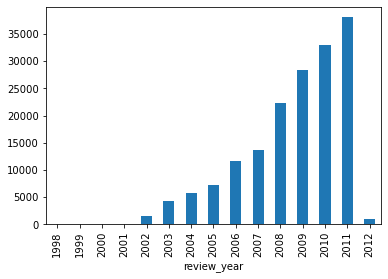

In [16]:
df_top50.groupby('review_year')['review_overall'].count().plot(kind='bar')

In [17]:
# drop rows by review_year that have less than 5000 reviews 
df_top50 = df_top50[df_top50.groupby('review_year')['review_overall'].transform('count').ge(5000)]

#### I wanted to create a new column that would contain each beer's type from the beer_style column. This was because most beer_style values contained either multiple types or were not clear enough to be used in the analysis. 

In [18]:
# create new column based on beer styles by beer type stated if different key words are in the beer style
df_top50['beer_type'] = np.where(df_top50['beer_style'].str.contains('IPA'), 'IPA',
                                np.where(df_top50['beer_style'].str.contains('Stout'), 'Stout',
                                            np.where(df_top50['beer_style'].str.contains('Porter'), 'Porter',
                                                        np.where(df_top50['beer_style'].str.contains('Lager'), 'Lager',
                                                                    np.where(df_top50['beer_style'].str.contains('Ale'), 'Ale',
                                                                                np.where(df_top50['beer_style'].str.contains('Wheat'), 'Wheat',
                                                                                            np.where(df_top50['beer_style'].str.contains('Pilsner'), 'Pilsner',
                                                                                                        np.where(df_top50['beer_style'].str.contains('Sour'), 'Sour',
                                                                                                                    np.where(df_top50['beer_style'].str.contains('Pale'), 'Pale',
                                                                                                                                np.where(df_top50['beer_style'].str.contains('Barley'), 'Barley',
                                                                                                                                            np.where(df_top50['beer_style'].str.contains('Belgian'), 'Belgian',
                                                                                                                                                np.where(df_top50['beer_style'].str.contains('Bock'), 'Bock',
                                                                                                                                                    np.where(df_top50['beer_style'].str.contains('Malt'), 'Malt',
                                                                                                                                                        np.where(df_top50['beer_style'].str.contains('Witbier'), 'Witbier',
                                                                                                                                                            np.where(df_top50['beer_style'].str.contains('Doppelbock'), 'Doppelbock',
                                                                                                                                                                np.where(df_top50['beer_style'].str.contains('Rauchbier'), 'Rauchbier',
                                                                                                                                                                    np.where(df_top50['beer_style'].str.contains('Kölsch'), 'Kölsch',
                                                                                                                                                                        np.where(df_top50['beer_style'].str.contains('Dunkel'), 'Dunkel',
                                                                                                                                                                            np.where(df_top50['beer_style'].str.contains('Weizenbock'), 'Weizenbock',
                                                                                                                                                                                np.where(df_top50['beer_style'].str.contains('Schwarzbier'), 'Schwarzbier',
                                                                                                                                                                                    np.where(df_top50['beer_style'].str.contains('Gose'), 'Gose',
                                                                                                                                                                                        np.where(df_top50['beer_style'].str.contains('Fruit'), 'Fruit',
                                                                                                                                                                                            np.where(df_top50['beer_style'].str.contains('Bière'), 'Bière',
                                                                                                                                                                                                np.where(df_top50['beer_style'].str.contains('Winter'), 'Seasonal',
                                                                                                                                                                                                    np.where(df_top50['beer_style'].str.contains('Summer'), 'Seasonal',
                                                                                                                                                                                                        np.where(df_top50['beer_style'].str.contains('Spring'), 'Seasonal',
                                                                                                                                                                                                            np.where(df_top50['beer_style'].str.contains('Fall'), 'Seasonal',
                                                                                                                                                                                                                np.where(df_top50['beer_style'].str.contains('Steam'), 'Steam',
                                                                                                                                                                                                                    np.where(df_top50['beer_style'].str.contains('Hefeweizen'), 'Wheat',
                                                                                                                                                                                                                        np.where(df_top50['beer_style'].str.contains('Pale Ale'), 'Pale',
                                                                                                                                                                                                                            np.where(df_top50['beer_style'].str.contains('ESB'), 'Pale',
                                                                                                                                                                                                                                np.where(df_top50['beer_style'].str.contains('Tripel'), 'Belgian',
                                                                                                                                                                                                                                    np.where(df_top50['beer_style'].str.contains('Dubbel'), 'Ale',
                                                                                                                                                                                                                                        np.where(df_top50['beer_style'].str.contains('Spiced'), 'Seasonal',
                                                                                                                                                                                                                                            np.where(df_top50['beer_style'].str.contains('Oktoberfest'), 'Seasonal',
                                                                                                                                                                                                                                                np.where(df_top50['beer_style'].str.contains('Bitter'), 'Pale',
                                                                                                                                                                                                                                                    np.where(df_top50['beer_style'].str.contains('Pilsener'), 'Pilsner',
                                                                                                  
'Other')))))))))))))))))))))))))))))))))))))

df_top50.head()

address categories         city country  \
1  2010 Williams St    Brewery  San Leandro      US   
2  2010 Williams St    Brewery  San Leandro      US   
3  2010 Williams St    Brewery  San Leandro      US   
4  2010 Williams St    Brewery  San Leandro      US   
5  2010 Williams St    Brewery  San Leandro      US   

                               key        lat        long  \
1  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   
2  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   
3  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   
4  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   
5  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   

             brewery_name      phones postalCode  ... review_profilename  \
1  21st Amendment Brewery  5105952111      94577  ...          illidurit   
2  21st Amendment Brewery  5105952111      94577  ...       magictrokini   
3  21st Amendment Brewery  5105952111      94577  ...     HapWifeHapLife   
4  21st Amendment Brewery  5105952111      94577  ...           pwoody11   
5  21st Amendment Brewery  5105952111      94577  ...           metter98   

                       beer_style  review_palate  review_taste  \
1  American Double / Imperial IPA            3.5           3.5   
2                    American IPA            3.0           4.0   
3                    American IPA            4.0           4.0   
4         Belgian Strong Dark Ale            4.0           4.0   
5         Belgian Strong Dark Ale            4.0           4.5   

            beer_name  beer_abv  beer_beerid  review_year review_month  \
1             21 Rock       9.7        66190         2011            3   
2        Harvest Moon       6.4        45648         2008           12   
3  21st Amendment IPA       7.0        20781         2010            1   
4        Monk's Blood       8.3        52510         2010            4   
5        Monk's Blood       8.3        52510         2010            3   

  beer_type  
1       IPA  
2       IPA  
3       IPA  
4       Ale  
5       Ale  

[5 rows x 28 columns]

#### While creating the beer_type column I noticed there are alot of beers within the 'Other' category, so I decided to go through the data and edit in not only new beer types but also add in some to existing categories. 

In [19]:
# value count of rows that contain 'Other' in beer_type column
df_top50['beer_type'].value_counts()

Ale            52220
IPA            39938
Stout          16080
Porter          9739
Barley          7949
Seasonal        6831
Lager           4912
Pilsner         2960
Fruit           2545
Bock            2528
Wheat           2362
Other           2279
Steam           1960
Pale            1951
Belgian         1560
Witbier         1535
Weizenbock      1111
Bière            571
Doppelbock       491
Kölsch           370
Schwarzbier      277
Dunkel           119
Rauchbier         77
Gose              43
Malt              43
Name: beer_type, dtype: int64

#### While searching through the data it was also discovered that not only was Califonia a large part of the dataset, but San Diego was labeled within the province column. 

In [20]:
# change province from 'San Diego' to 'CA' in province column
df_top50['province'] = df_top50['province'].replace('San Diego', 'CA')


In [21]:
# save dataframe to csv
df_top50.to_csv('data/beer_df.csv', index=False)

#### After saving the prepared data, I decided to create a map of what was contained within the merged dataset. 

In [22]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260515 entries, 0 to 260514
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   address             260515 non-null  object 
 1   categories          260515 non-null  object 
 2   city                260515 non-null  object 
 3   country             260515 non-null  object 
 4   key                 260515 non-null  object 
 5   lat                 242757 non-null  float64
 6   long                242757 non-null  float64
 7   brewery_name        260515 non-null  object 
 8   phones              238035 non-null  object 
 9   postalCode          255874 non-null  object 
 10  province            260515 non-null  object 
 11  websites            205413 non-null  object 
 12  index               260515 non-null  int64  
 13  brewery_id          260515 non-null  int64  
 14  review_time         260515 non-null  int64  
 15  review_overall      260515 non-nul

In [23]:
# keep all rows that contain values in lat and long columns
df_merged = df_merged[df_merged['lat'].notna()]
df_merged = df_merged[df_merged['long'].notna()]
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242757 entries, 0 to 260514
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   address             242757 non-null  object 
 1   categories          242757 non-null  object 
 2   city                242757 non-null  object 
 3   country             242757 non-null  object 
 4   key                 242757 non-null  object 
 5   lat                 242757 non-null  float64
 6   long                242757 non-null  float64
 7   brewery_name        242757 non-null  object 
 8   phones              223386 non-null  object 
 9   postalCode          242061 non-null  object 
 10  province            242757 non-null  object 
 11  websites            194059 non-null  object 
 12  index               242757 non-null  int64  
 13  brewery_id          242757 non-null  int64  
 14  review_time         242757 non-null  int64  
 15  review_overall      242757 non-nul

<AxesSubplot:>

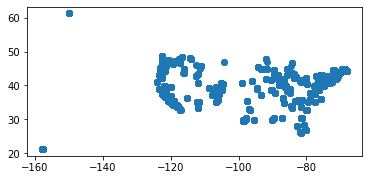

In [24]:
# plot location of breweries using lat and long columns using geopandas
import geopandas as gpd
from shapely.geometry import Point

# create geometry column
geometry = [Point(xy) for xy in zip(df_merged['long'], df_merged['lat'])]

# create geodataframe
gdf = gpd.GeoDataFrame(df_merged, geometry=geometry)

# plot breweries
gdf.plot()

<AxesSubplot:>

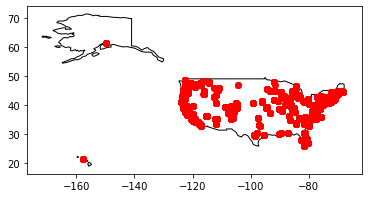

In [25]:
# use geopandas to plot locations of breweries on map of united states
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
us = world[world.name == 'United States of America']

# plot breweries on map of united states
ax = us.plot(color='white', edgecolor='black')
gdf.plot(ax=ax, color='red')

<AxesSubplot:>

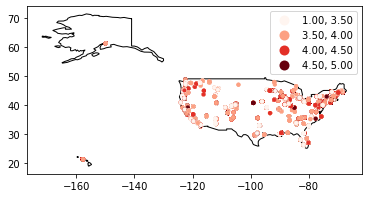

In [26]:
# use geopandas to plot locations of breweries on map of united states, with markers
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
us = world[world.name == 'United States of America']

# plot breweries on map of united states
ax = us.plot(color='white', edgecolor='black')
gdf.plot(ax=ax, column='review_overall', cmap='Reds', scheme='quantiles', legend=True, markersize=10, k=4)

In [27]:
# use geojson to plot locations of breweries on map of united states in folium
import folium
from folium.plugins import HeatMap

# create map of united states
m = folium.Map(location=[39.8283, -98.5795], zoom_start=4)

# create list of brewery locations
locations = gdf[['lat', 'long']].values.tolist()

# create list of brewery review counts
review_counts = gdf['review_overall'].values.tolist()

# create heatmap of brewery locations
HeatMap(data=locations, radius=15).add_to(m)

# save map to Models folder 
m.save('Models/beer_map.jpeg')

# show map
m

#### As this created a very cool interative visual, I decided to save this dataframe for any future analysis after the models were created.

In [28]:
# create save of df_merged
df_merged.to_csv('data/all_beer_df.csv', index=False)

# Data Visualization

#### A lot of the visualization performed was to help support the analysis and models. The business understanding was to help breweries understand their consumers and what they are looking for, which is why the following visualizations were chosen. 

#### As an easter egg, the coloration of the charts are colors from popular beer types across the SRC (coloration) scale.

In [29]:
# palatte of beers colors 
# palette=["#FCCE00","#F17100","#DC3711","#8F3237","#3C1D23"]
# #f28e1c - light beer color (recognizable)

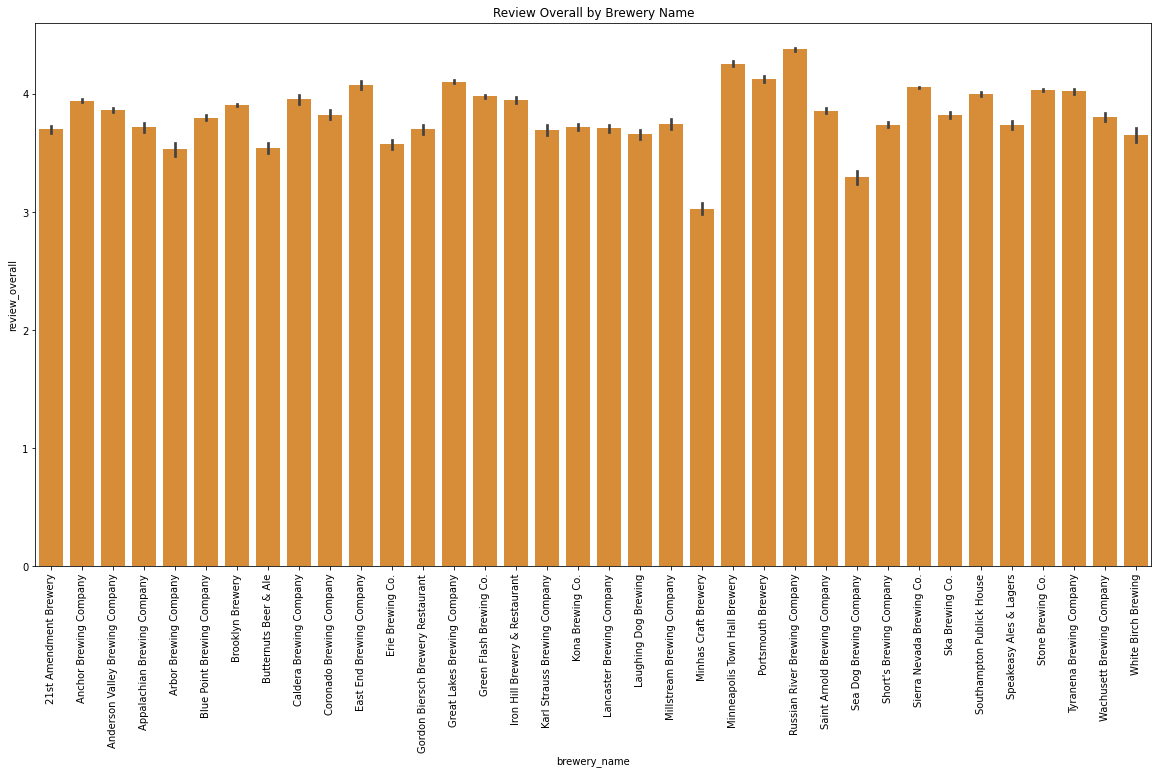

In [30]:
# create plots of review_overall by brewery_name
plt.figure(figsize=(20,10))
sns.barplot(x='brewery_name', y='review_overall', data=df_top50, palette=["#f28e1c"])
plt.title('Review Overall by Brewery Name')
plt.xticks(rotation=90)
plt.show()

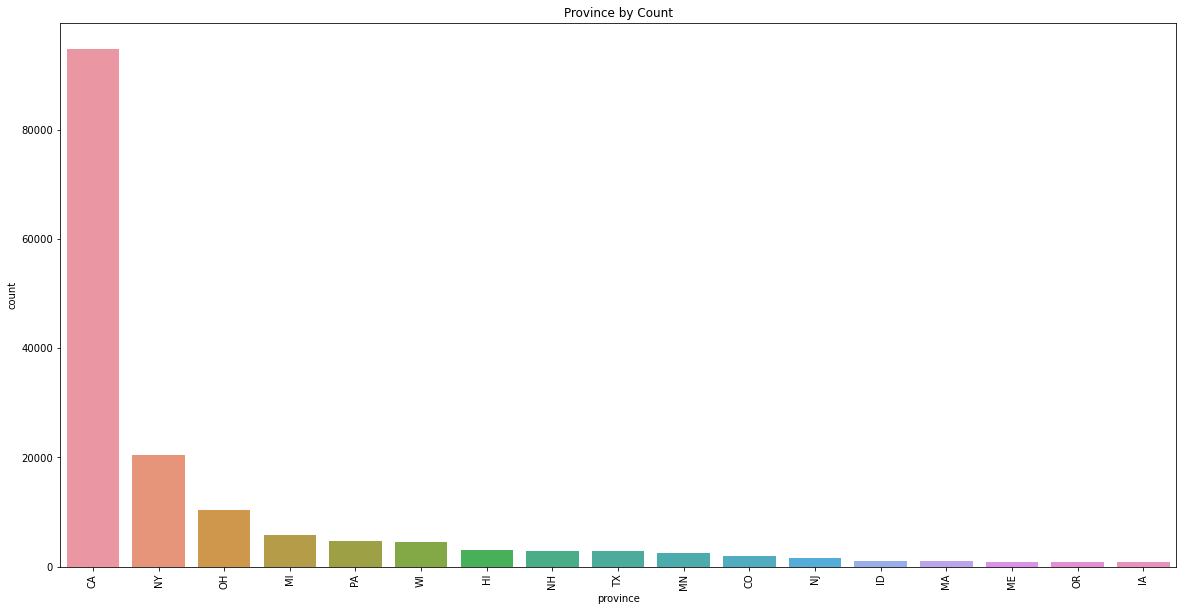

In [31]:
# create plots of province by count sorted in descending order

plt.figure(figsize=(20,10))
sns.countplot(x='province', data=df_top50, order=df_top50['province'].value_counts().index)
plt.title('Province by Count')
plt.xticks(rotation=90)
plt.show()

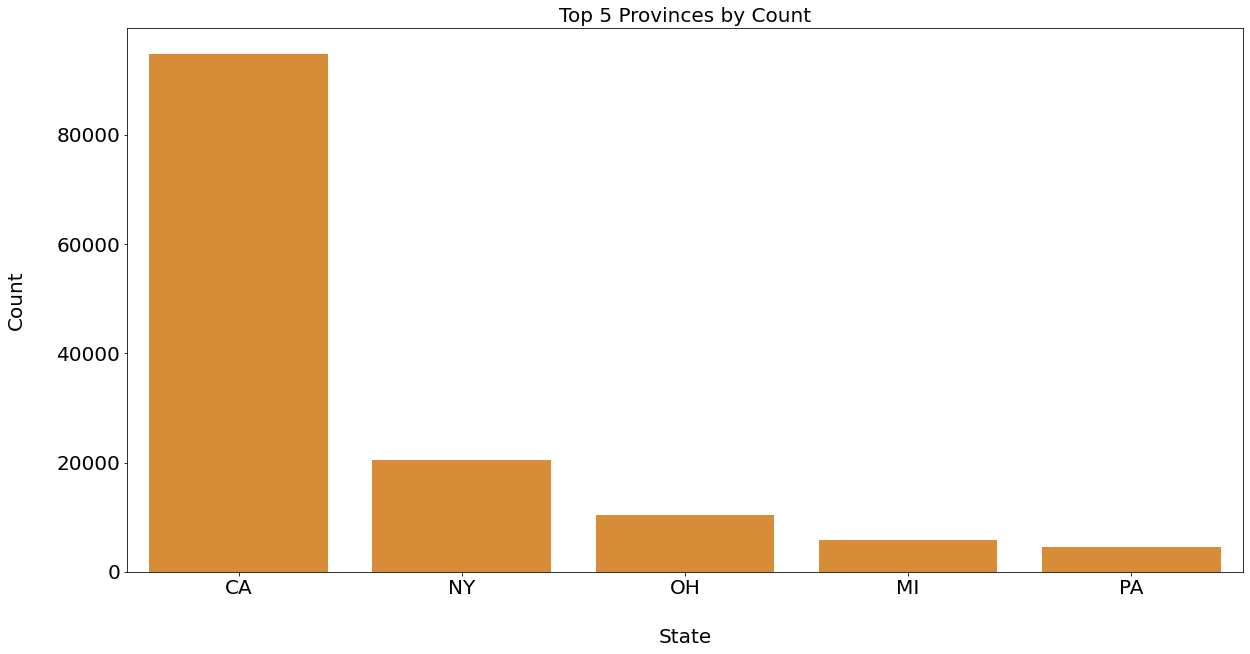

In [32]:
# plot count of top 5 provinces 
plt.figure(figsize=(20,10))
sns.countplot(x='province', data=df_top50, order=df_top50['province'].value_counts().iloc[:5].index, palette=["#f28e1c"])
plt.title('Top 5 Provinces by Count', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('State', fontsize=20, labelpad=30)
plt.ylabel('Count', fontsize=20, labelpad=30)
plt.show()

In [33]:
# find percentage of data that is taken up by CA
df_top50['province'].value_counts(normalize=True)

CA    0.590897
NY    0.127989
OH    0.065173
MI    0.035774
PA    0.028788
WI    0.028675
HI    0.019233
NH    0.018436
TX    0.017420
MN    0.015662
CO    0.012191
NJ    0.009822
ID    0.007011
MA    0.006818
ME    0.005684
OR    0.005428
IA    0.004998
Name: province, dtype: float64

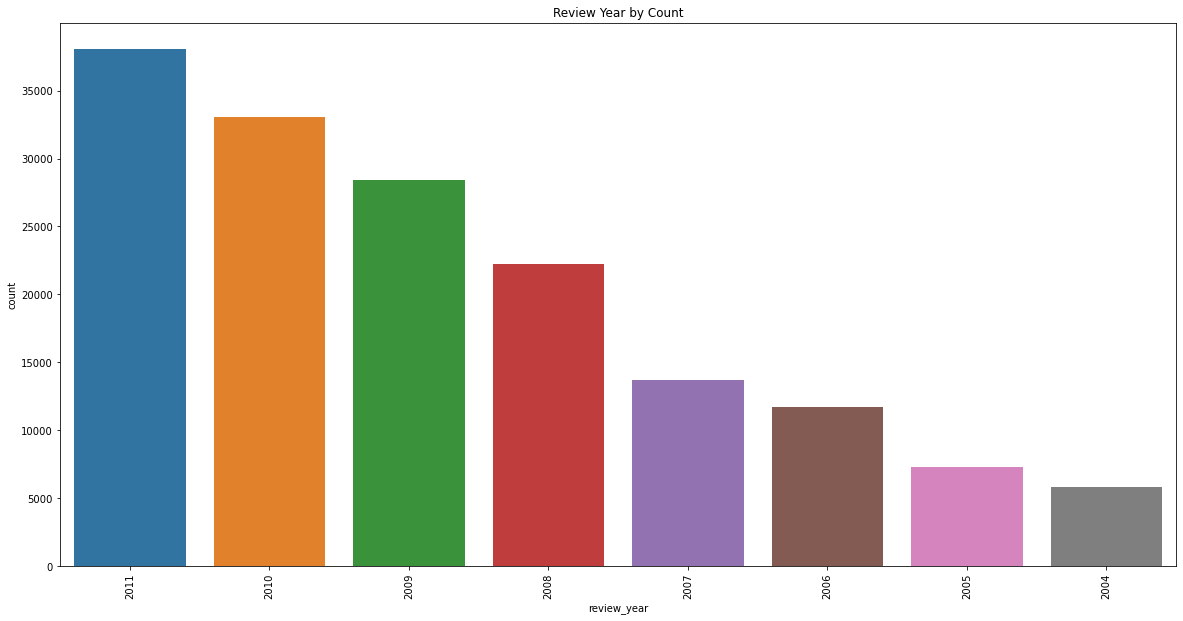

In [34]:
# create plots of review_year by count sorted in descending order
plt.figure(figsize=(20,10))
sns.countplot(x='review_year', data=df_top50, order=df_top50['review_year'].value_counts().index)
plt.title('Review Year by Count')
plt.xticks(rotation=90)
plt.show()

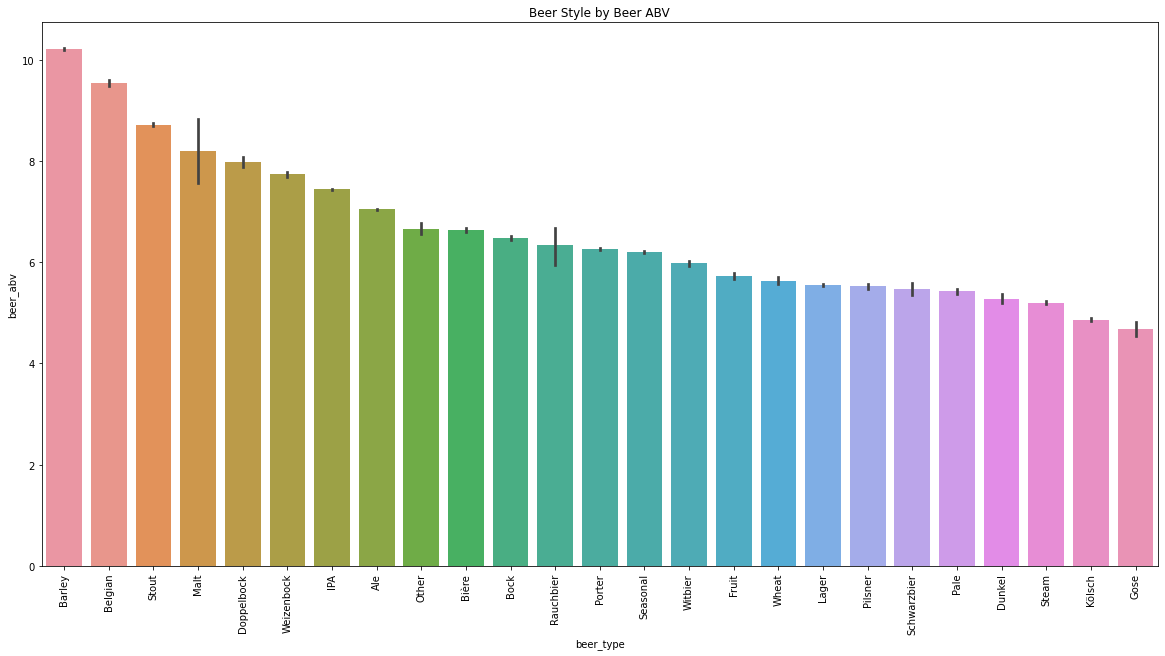

In [35]:
# plot beer_style by beer_abv sorted in descending order
plt.figure(figsize=(20,10))
sns.barplot(x='beer_type', y='beer_abv', data=df_top50, order=df_top50.groupby('beer_type')['beer_abv'].mean().sort_values(ascending=False).index)
plt.title('Beer Style by Beer ABV')
plt.xticks(rotation=90)
plt.show()

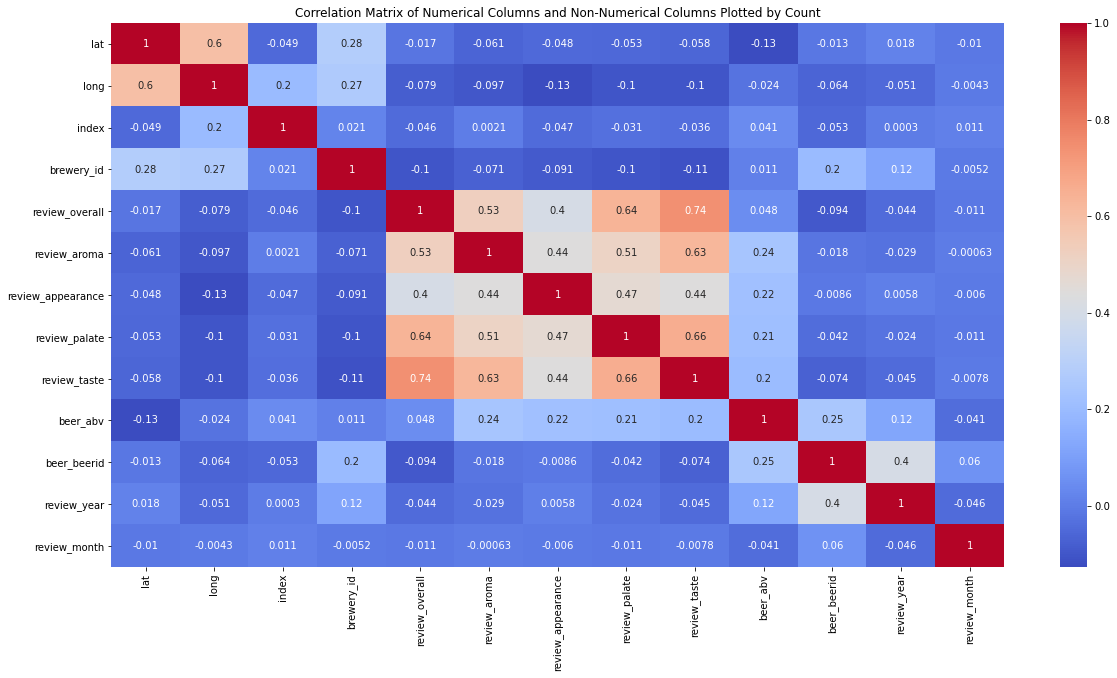

In [36]:
# plot correlation matrix of numerical columns
plt.figure(figsize=(20,10))
sns.heatmap(df_top50.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Columns and Non-Numerical Columns Plotted by Count')
plt.show()

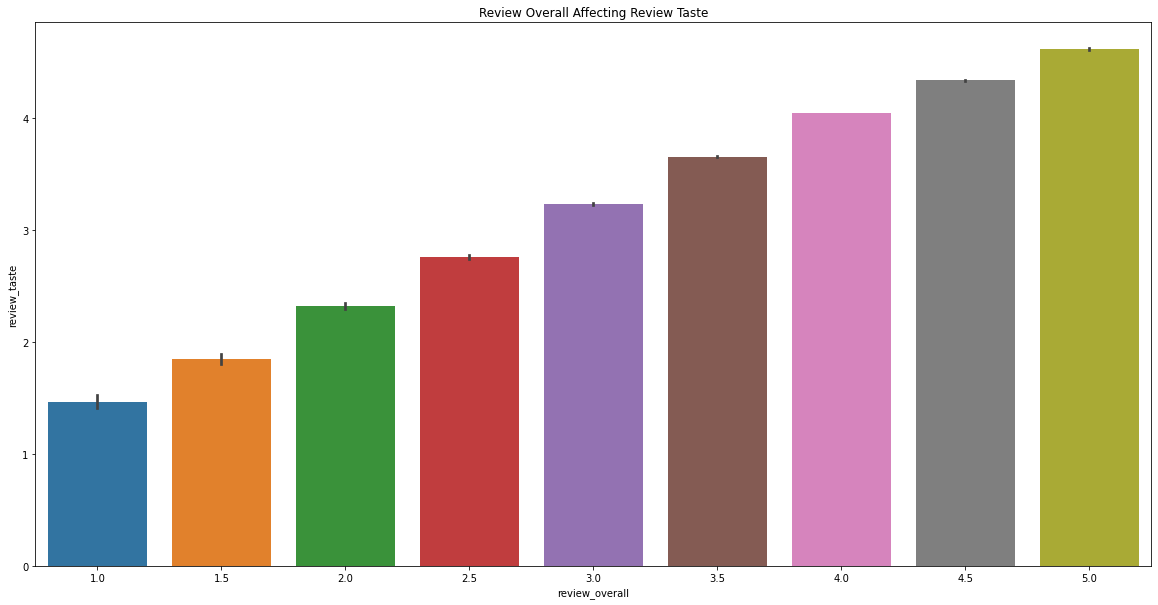

In [37]:
# review overall affecting review_taste
plt.figure(figsize=(20,10))
sns.barplot(x='review_overall', y='review_taste', data=df_top50)
plt.title('Review Overall Affecting Review Taste')
plt.show()

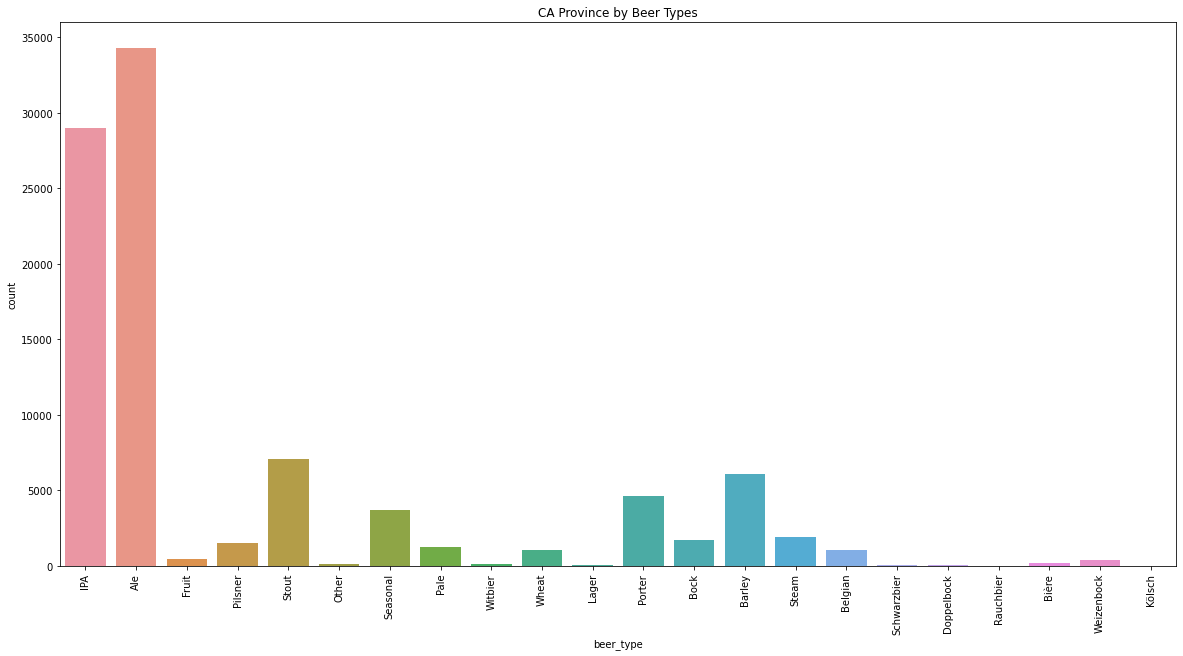

In [38]:
# plot of 'CA' province by beer_types
plt.figure(figsize=(20,10))
sns.countplot(x='beer_type', data=df_top50[df_top50['province'] == 'CA'])
plt.title('CA Province by Beer Types')
plt.xticks(rotation=90)
plt.show()

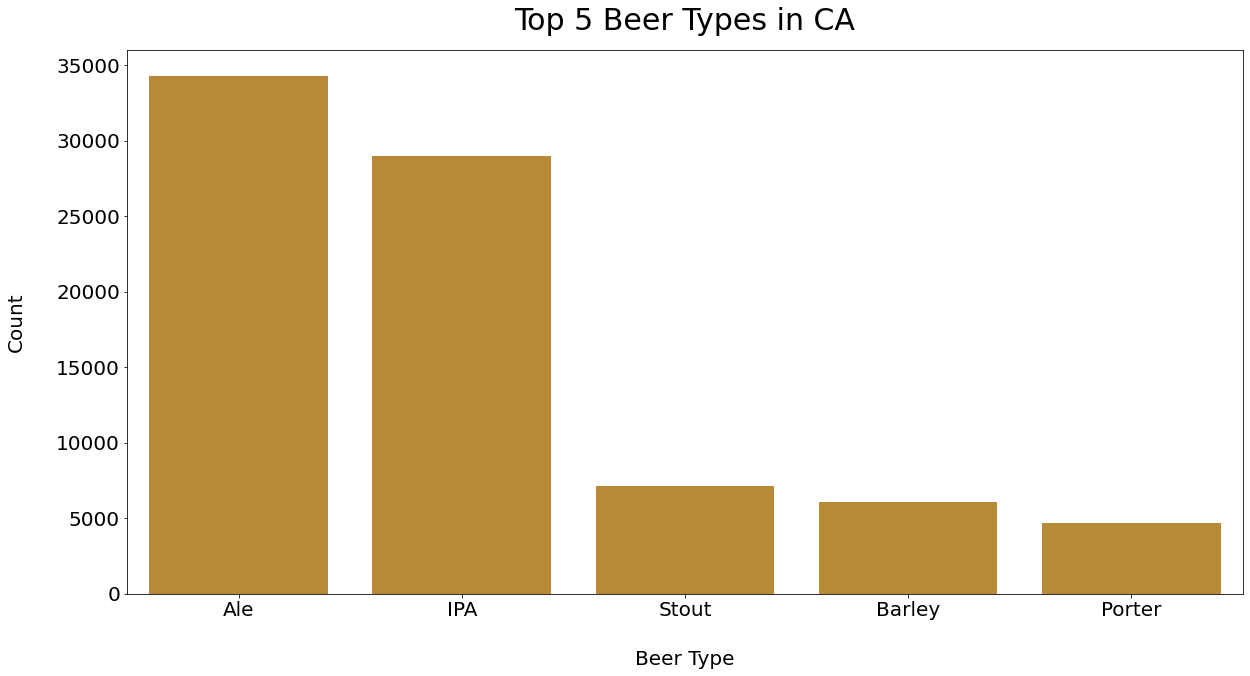

In [39]:
# plot top 5 beer types in CA color as "#CD8F22", larger font size of axes labels, with space between bar and label
plt.figure(figsize=(20,10))
sns.countplot(x='beer_type', data=df_top50[df_top50['province'] == 'CA'], order=df_top50[df_top50['province'] == 'CA']['beer_type'].value_counts().iloc[:5].index, palette=["#CD8F22"])
plt.title('Top 5 Beer Types in CA', fontsize=30, pad=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Beer Type', fontsize=20, labelpad=30)
plt.ylabel('Count', fontsize=20, labelpad=30)

#Saving model and showing plot
plt.savefig("Models/CA_top_beer_types.jpeg", bbox_inches = 'tight')
plt.show()

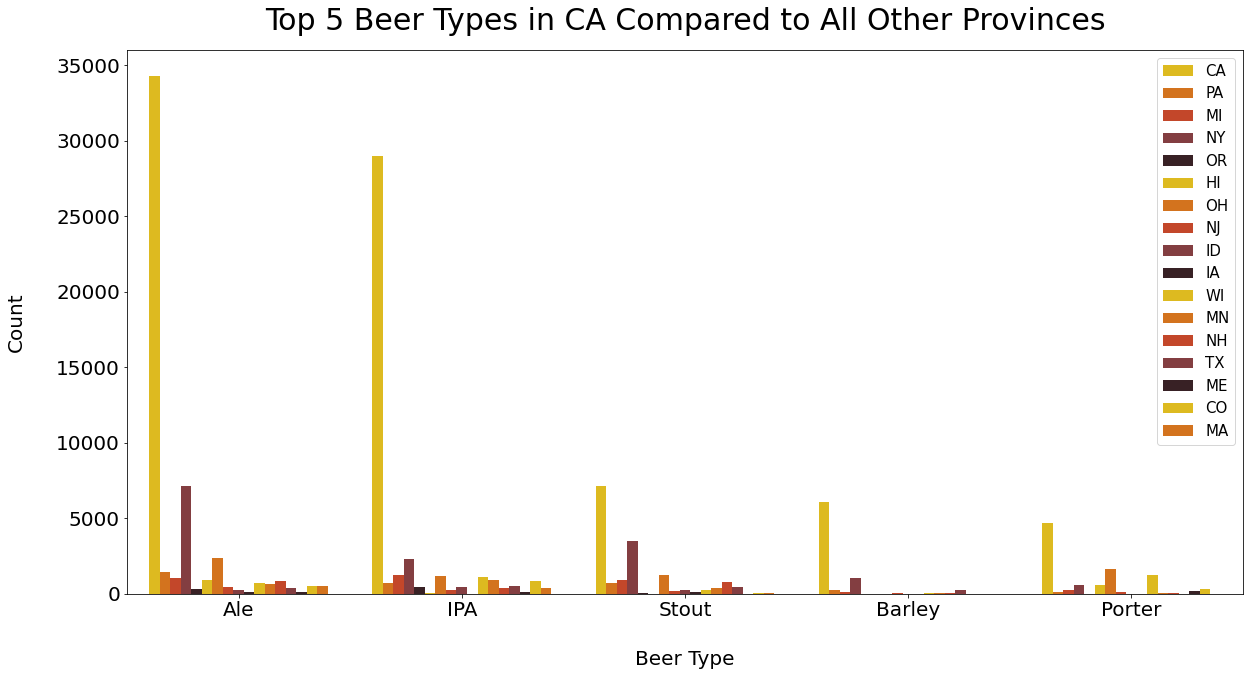

In [40]:
# beer_types in CA count compared to all other provinces3C1D23
plt.figure(figsize=(20,10))
sns.countplot(x='beer_type', data=df_top50, hue='province', order=df_top50[df_top50['province'] == 'CA']['beer_type'].value_counts().iloc[:5].index, palette=["#FCCE00", "#F17100","#DC3711","#8F3237","#3C1D23"])
plt.title('Top 5 Beer Types in CA Compared to All Other Provinces', fontsize=30, pad=20)
plt.legend(loc='upper right', fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Beer Type', fontsize=20, labelpad=30)
plt.ylabel('Count', fontsize=20, labelpad=30)
plt.show()

In [41]:
# make ca_plot_year of only province, beer_type and review_year
ca_plot_year = df_top50[df_top50['province'] == 'CA'][['beer_type', 'review_year']]

In [42]:
ca_plot_year.head()

beer_type  review_year
1       IPA         2011
2       IPA         2008
3       IPA         2010
4       Ale         2010
5       Ale         2010

In [43]:
# remove all rows that contain anything other than IPA and Ale in beer_type
ca_plot_year = ca_plot_year[ca_plot_year['beer_type'].str.contains('IPA|Ale')]

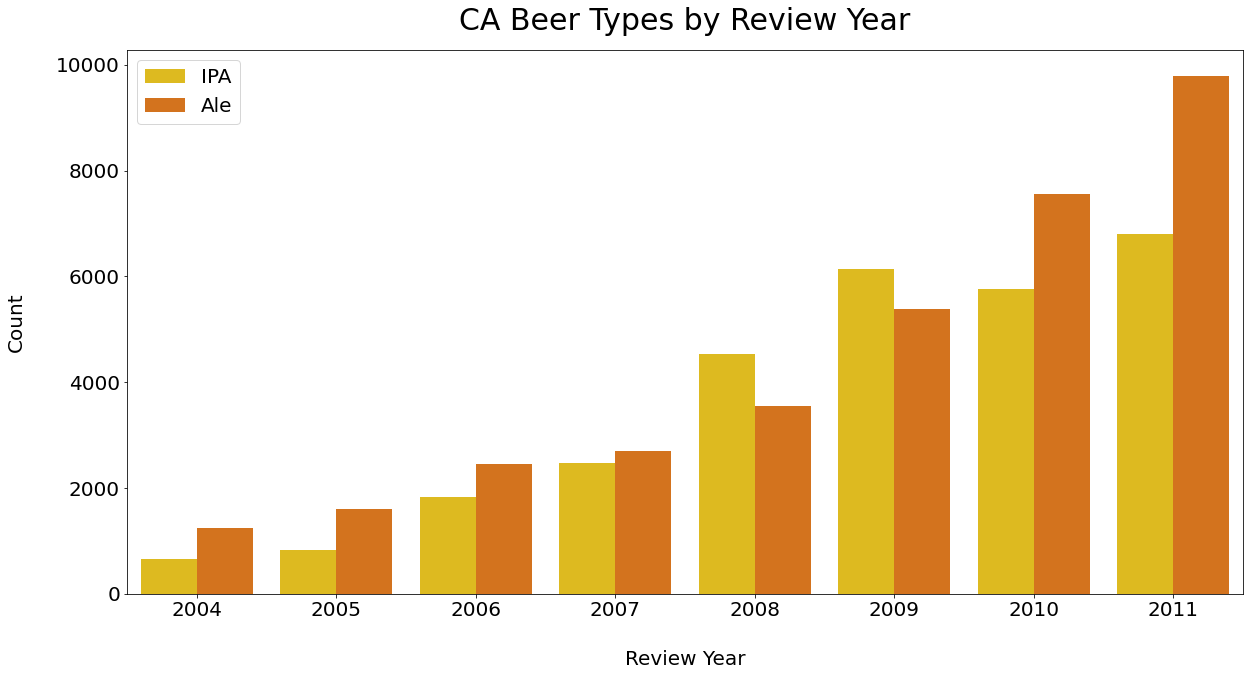

In [44]:
# plot ca_plot_year by beer_type and review_year, ascending order of review_year
plt.figure(figsize=(20,10))
sns.countplot(x='review_year', data=ca_plot_year, hue='beer_type', order=ca_plot_year['review_year'].value_counts().sort_index().index, palette=["#FCCE00", "#F17100"])
plt.title('CA Beer Types by Review Year', fontsize=30, pad=20)
plt.legend(loc='upper left', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Review Year', fontsize=20, labelpad=30)
plt.ylabel('Count', fontsize=20, labelpad=30)

#Saving model and showing plot
plt.savefig("Models/CA_beer_types_by_Year.jpeg", bbox_inches = 'tight')
plt.show()

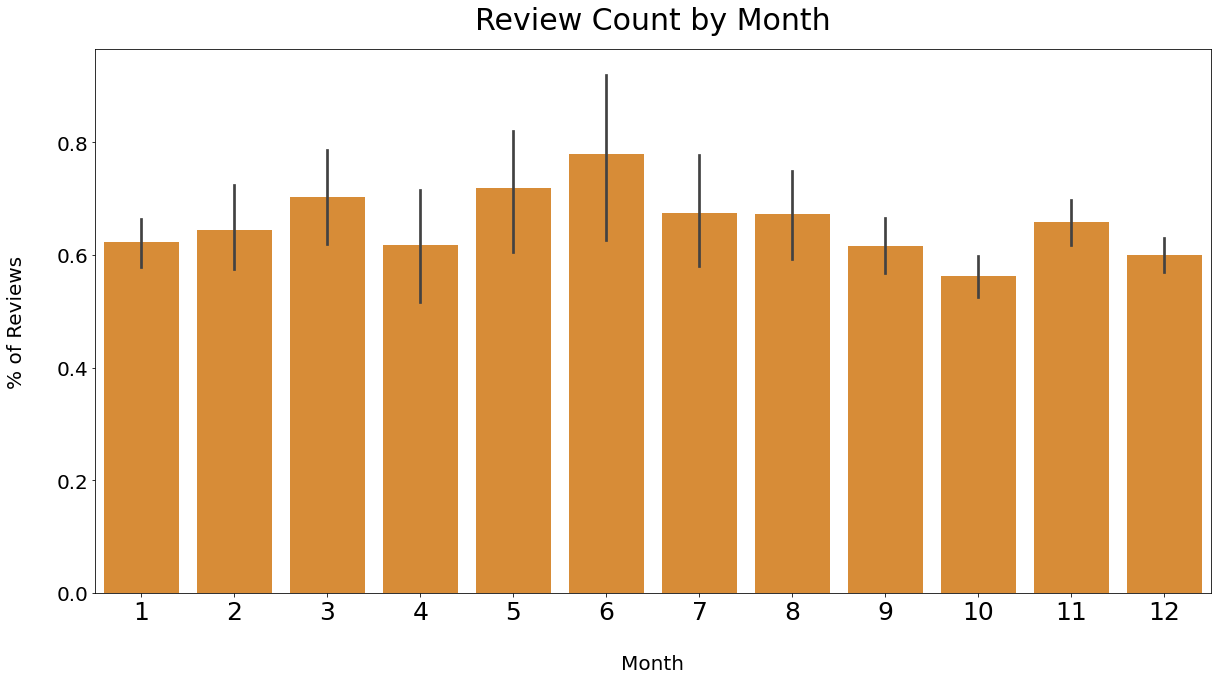

In [45]:
# plot std review_overall by review_month only using rows that contain seasonal in beer_type column
plt.figure(figsize=(20,10))
sns.barplot(x='review_month', y='review_overall', estimator=np.std, data=df_top50[df_top50['beer_type'] == 'Seasonal'], palette=["#f28e1c"])
plt.title('Review Count by Month', fontsize=30, pad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=20)
plt.xlabel('Month', fontsize=20, labelpad=30)
plt.ylabel('% of Reviews', fontsize=20, labelpad=30)

#Saving model and showing plot
plt.savefig("Models/Review_by_Month.jpeg", bbox_inches = 'tight')
plt.show()

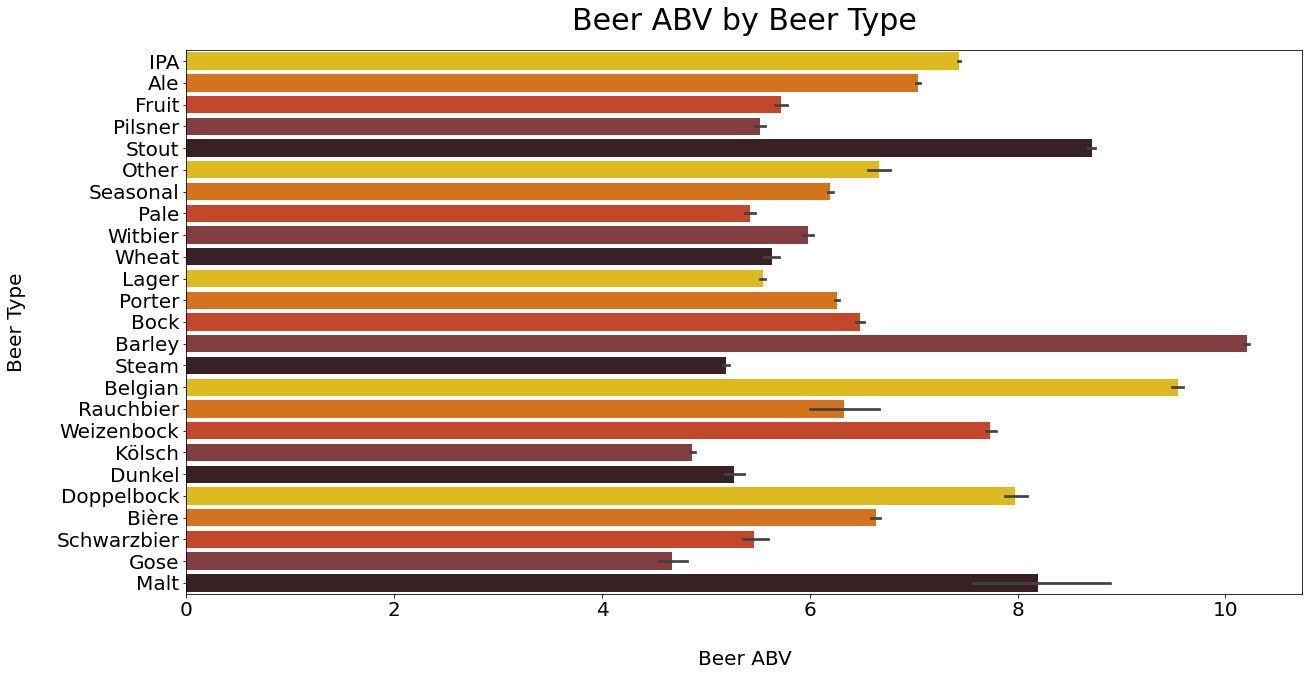

In [46]:
# plot beer_abv by beer_type
plt.figure(figsize=(20,10))
sns.barplot(x='beer_abv', y='beer_type', data=df_top50, palette=["#FCCE00", "#F17100","#DC3711","#8F3237","#3C1D23"])
plt.title('Beer ABV by Beer Type', fontsize=30, pad=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Beer ABV', fontsize=20, labelpad=30)
plt.ylabel('Beer Type', fontsize=20, labelpad=30)

#Saving model and showing plot
#plt.savefig("Models/ABV_by_Beer_Type.jpeg", bbox_inches = 'tight')
plt.show()

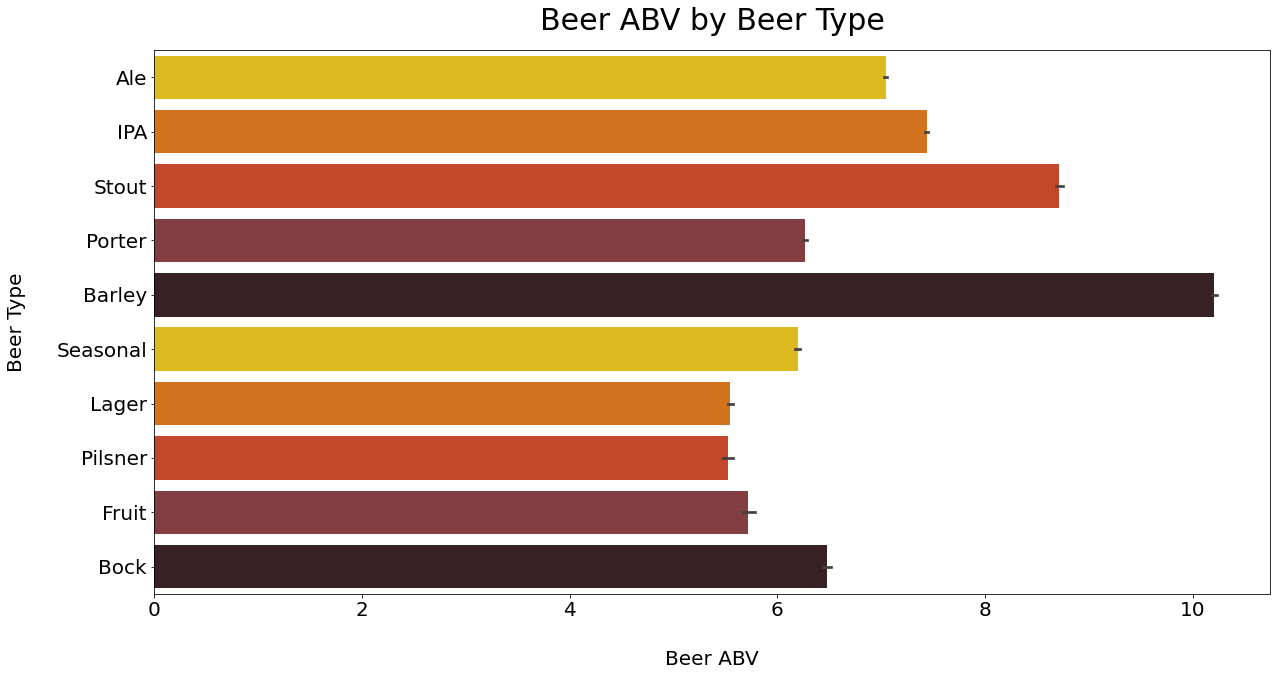

In [47]:
# plot beer_abv by beer_type only showing top 10 beer_types by count
plt.figure(figsize=(20,10))
sns.barplot(x='beer_abv', y='beer_type', data=df_top50, order=df_top50['beer_type'].value_counts().iloc[:10].index, palette=["#FCCE00", "#F17100","#DC3711","#8F3237","#3C1D23"])
plt.title('Beer ABV by Beer Type', fontsize=30, pad=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Beer ABV', fontsize=20, labelpad=30)
plt.ylabel('Beer Type', fontsize=20, labelpad=30)

#Saving model and showing plot
plt.savefig("Models/ABV_by_Beer_Type.jpeg", bbox_inches = 'tight')
plt.show()

In [48]:
#show values of review_profilenames that are top 10 most commmon
df_top50['review_profilename'].value_counts().head(10)

akorsak           434
mikesgroove       416
Thorpe429         361
womencantsail     360
northyorksammy    336
Kegatron          332
BuckeyeNation     306
brentk56          305
drabmuh           272
tempest           270
Name: review_profilename, dtype: int64

In [49]:
#show values of review_profilenames that are the top percent of the data
df_top50['review_profilename'].value_counts(normalize=True).head(10)

akorsak           0.002705
mikesgroove       0.002593
Thorpe429         0.002250
womencantsail     0.002244
northyorksammy    0.002094
Kegatron          0.002069
BuckeyeNation     0.001907
brentk56          0.001901
drabmuh           0.001695
tempest           0.001683
Name: review_profilename, dtype: float64

We had about 250 users that have rated more than 100 beers, so there are no super users within the dataset, which is good for our analysis.

# Data Modeling

#### The models that were used for this project were: 

Collaborative Filtering - focusing on reviews_overall

Content-Based Filtering - focusing on beer_abv (ultimately beer_type)

Location-Based Filtering - focusing on lat and long of breweries

Each model was used to create a recommendation system that would help breweries understand their consumers and what they are looking for.

## Collaborative Filtering Model

In [50]:
# Performing a Baseline Model

# df_top50 with normal_predictor and train test split from surprise
from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_top50[['review_profilename', 'beer_name', 'review_overall']], reader)

trainset, testset = train_test_split(data, test_size=.25)

model = NormalPredictor()
model.fit(trainset)
predictions = model.test(testset)

accuracy.mae(predictions)
accuracy.mse(predictions)

MAE:  0.6856
MSE: 0.7565


0.7564824421685463

In [51]:
# The best algoritm for this dataset that ran uses SVD

# Running a model with SVD
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_top50[['review_profilename', 'beer_name', 'review_overall']], reader)

trainset, testset = train_test_split(data, test_size=.25)

model = SVD()
model.fit(trainset)
predictions = model.test(testset)

accuracy.mse(predictions)
accuracy.mae(predictions)

MSE: 0.3142
MAE:  0.4183


0.4183036668648049

In [52]:
# I also performed the SVD algorithm with the parameters given to me from a grid search, which gave me around the same results

# run model svd using gridsearchcv
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV

reader = Reader(rating_scale=(1.0, 5.0))
data = Dataset.load_from_df(df_top50[['review_profilename', 'beer_name', 'review_overall']], reader)

param_grid = {'n_factors': [50, 100, 150], 'n_epochs': [20, 40, 60], 'lr_all': [0.002, 0.005, 0.008], 'reg_all': [0.4, 0.6, 0.8]}
gs = GridSearchCV(SVD, param_grid, measures=['mse', 'mae'], cv=3)

gs.fit(data)

print(gs.best_score['mse'])
print(gs.best_params['mse'])

print(gs.best_score['mae'])
print(gs.best_score['mae'])

0.3153375529593245
{'n_factors': 50, 'n_epochs': 60, 'lr_all': 0.002, 'reg_all': 0.4}
0.41496385931130814
0.41496385931130814


In [53]:
# Running a tuned SVD model with parameters
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_top50[['review_profilename', 'beer_name', 'review_overall']], reader)

trainset, testset = train_test_split(data, test_size=.25)

model = SVD(n_factors= 50, n_epochs= 60, lr_all= 0.002, reg_all= 0.4)
model.fit(trainset)
predictions = model.test(testset)

accuracy.mse(predictions)
accuracy.mae(predictions)

MSE: 0.3140
MAE:  0.4157


0.4157012524032325

In [54]:
# Performing the same actions with the RandomizedSearchCV algorithm left me with the same results. 

# Run model svd using randomizedsearchcv
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import RandomizedSearchCV

reader = Reader(rating_scale=(1.0, 5.0))
data = Dataset.load_from_df(df_top50[['review_profilename', 'beer_name', 'review_overall']], reader)

param_grid = {'n_factors': [50, 100, 150], 'n_epochs': [20, 40, 60], 'lr_all': [0.002, 0.005, 0.008], 'reg_all': [0.4, 0.6, 0.8]}
gs = RandomizedSearchCV(SVD, param_grid, measures=['mse', 'mae'], cv=3)

gs.fit(data)

print(gs.best_score['mse'])
print(gs.best_params['mse'])

print(gs.best_score['mae'])
print(gs.best_score['mae'])

0.3152074374113692
{'n_factors': 50, 'n_epochs': 60, 'lr_all': 0.002, 'reg_all': 0.4}
0.4149056585036779
0.4149056585036779


In [55]:
# Running a tuned SVD model with parameters
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_top50[['review_profilename', 'beer_name', 'review_overall']], reader)

trainset, testset = train_test_split(data, test_size=.25)

model = SVD(n_factors= 50, n_epochs= 60, lr_all= 0.002, reg_all= 0.4)
model.fit(trainset)
predictions = model.test(testset)

accuracy.mse(predictions)
accuracy.mae(predictions)

MSE: 0.3131
MAE:  0.4145


0.41445400634530843

#### Using the best model to create a recommendation system. 

In [56]:
# Use model to create recommendation system for user 
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_top50[['review_profilename', 'beer_name', 'review_overall']], reader)

trainset, testset = train_test_split(data, test_size=.25)

algo = SVD(n_factors= 150, n_epochs= 40, lr_all= 0.005, reg_all= 0.4)
algo.fit(trainset)
predictions = algo.test(testset)

#### The recommendation system performed is based on the user and the beer they have rated. 

In [57]:
# create function to recommend beers to a user based on a specific beer 
def recommend_beers_from_beer(user_id, beer_name, n_recommendations, algo):
    user_ratings = df_top50[df_top50['review_profilename'] == user_id]
    user_beers = user_ratings['beer_name'].unique()
    beers_to_recommend = df_top50[~df_top50['beer_name'].isin(user_beers)]
    
    recommendations = beers_to_recommend.groupby('beer_name').agg({'review_overall': 'mean'}).sort_values('review_overall', ascending=False).head(n_recommendations)
    return recommendations

# get recommendations for user 'northyorksammy' based on the beer 'Sierra Nevada Pale Ale'
recommend_beers_from_beer('northyorksammy', 'Sierra Nevada Pale Ale', 10, algo)

review_overall
beer_name                                                        
Au Ciel                                                       5.0
Best Bitter Ale With Cascade And Chinook Dry Hops             5.0
St. Patrick O'Sullivan's Irish Red                            5.0
Stone Old Guardian Barley Wine Style Ale 1999                 5.0
Kaldi Kreme                                                   5.0
Sparnfarkel Smoked Porter                                     5.0
Bourbon Barley Wine                                           5.0
Cauldron Brew                                                 5.0
Kona Belgian Triple                                           5.0
Anniversary Ale 2003                                          5.0

In [58]:
# create function to predict the rating of a beer for a user
def predict_rating(user_id, beer_name, algo):
    beer_id = df_top50[df_top50['beer_name'] == beer_name]['beer_beerid'].unique()[0]
    user_id = df_top50[df_top50['review_profilename'] == user_id]['review_profilename'].unique()[0]
    return algo.predict(user_id, beer_id).est

# print both the predicted rating and the actual rating for user 'northyorksammy' for beer 'Sierra Nevada Pale Ale'
print('Predicted Rating: ')
print(predict_rating('northyorksammy', 'Sierra Nevada Pale Ale', algo))
print(' ')
print('Actual Rating: ')
print(df_top50[(df_top50['review_profilename'] == 'northyorksammy') & (df_top50['beer_name'] == 'Sierra Nevada Pale Ale')]['review_overall'].unique()[0])

Predicted Rating: 
3.9059600528350473
 
Actual Rating: 
4.0


#### Created another recommendation that generates a list of beers based on the specific brewery. 

In [59]:
# create a function to recommend beers to a user only from a specific brewery
def recommend_beers_from_brewery(user_id, brewery_name, n_recommendations, algo):
    user_ratings = df_top50[df_top50['review_profilename'] == user_id]
    user_beers = user_ratings['beer_name'].unique()
    beers_to_recommend = df_top50[~df_top50['beer_name'].isin(user_beers)]
    beers_from_brewery = beers_to_recommend[beers_to_recommend['brewery_name'] == brewery_name]
    
    recommendations = beers_from_brewery.groupby('beer_name').agg({'review_overall': 'mean'}).sort_values('review_overall', ascending=False).head(n_recommendations)
    return recommendations

# get recommendations for user 'northyorksammy' based on the brewery 'Sierra Nevada Brewing Co.'
recommend_beers_from_brewery('northyorksammy', 'Sierra Nevada Brewing Co.', 10, algo)

review_overall
beer_name                                                        
Best Bitter Ale With Cascade And Chinook Dry Hops        5.000000
Rhymes Wit - Beer Camp #20                               4.666667
22 Bines Blonde IPA - Beer Camp #9                       4.500000
Red Perle Red Ale - Beer Camp #11                        4.500000
Liquid Sourdough (LSD) - Beer Camp #41                   4.500000
Knightro – Celtic Festival Beer                          4.500000
Knightro ESB - Beer Camp #23                             4.500000
Que Syrah, Syrah!                                        4.500000
Sierra Nevada Kölsch Style Ale                           4.444444
Brewer's Blackbird Black IPA - Beer Camp #27             4.423077

## Content-Based Filtering Model

#### In order for this model to perform, I had to create a new column that would rate the beers abv (alcohol by volume). 

Creation of column for ABV Range metrics chosen as follows:
- 1 (Low ABV) is 0-4.9%
- 2 (Medium ABV) is 5-9.9%
- 3 (High ABV) is 10-14.9%
- 4 (Very High ABV) is 15-20%

In [60]:
# create new column of abv ranges with 0-4.9 being 1, 5-9.9 being 2, 10-14.9 being 3, 15-20 being 4
df_top50['abv_range'] = pd.cut(df_top50['beer_abv'], bins=[0, 4.9, 9.9, 14.9, 20], labels=[1, 2, 3, 4])

In [61]:
df_top50['abv_range'].value_counts()

2    128481
3     19995
1     11924
4        51
Name: abv_range, dtype: int64

In [62]:
# Running a baseline model with the new abv_range column

# Running a model with NormalPredictor 
from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_top50[['review_profilename', 'beer_name', 'abv_range']], reader)

trainset, testset = train_test_split(data, test_size=.25)

abv_base = NormalPredictor()
abv_base.fit(trainset)
predictions = abv_base.test(testset)

accuracy.mse(predictions)
accuracy.mae(predictions)

MSE: 0.3952
MAE:  0.4843


0.4842553807156319

#### The best performing model used the famous SVD algorithm. 

In [63]:
#Running a model with SVD
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_top50[['review_profilename', 'beer_name', 'abv_range']], reader)

trainset, testset = train_test_split(data, test_size=.25)

svd_abv = SVD()
svd_abv.fit(trainset)
predictions = svd_abv.test(testset)

accuracy.mse(predictions)
accuracy.mae(predictions)

MSE: 0.0079
MAE:  0.0403


0.04025201631566468

#### We ran a gridsearch to find the best parameters for the model, but there was not much of a difference. 

In [64]:
# Perform a grid search to find the best parameters for SVD
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import GridSearchCV

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_top50[['review_profilename', 'beer_name', 'abv_range']], reader)

param_grid = {'n_factors': [50, 100, 150], 'n_epochs': [20, 40, 60], 'lr_all': [0.002, 0.005, 0.008], 'reg_all': [0.4, 0.6, 0.8]}
gs = GridSearchCV(SVD, param_grid, measures=['mse', 'mae'], cv=3)

gs.fit(data)

# Print the best parameters
print(gs.best_params['mse'])
print(gs.best_score['mse'])
print(gs.best_params['mae'])
print(gs.best_score['mae'])

{'n_factors': 50, 'n_epochs': 60, 'lr_all': 0.005, 'reg_all': 0.4}
0.020970881839089166
{'n_factors': 50, 'n_epochs': 60, 'lr_all': 0.002, 'reg_all': 0.4}
0.08019281861242711


In [65]:
# Running a model with SVD with the best parameters
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_top50[['review_profilename', 'beer_name', 'abv_range']], reader)

trainset, testset = train_test_split(data, test_size=.25)

svd_abv = SVD(n_factors= 50, n_epochs= 60, lr_all= 0.005, reg_all= 0.4)
svd_abv.fit(trainset)
predictions = svd_abv.test(testset)

accuracy.mse(predictions)
accuracy.mae(predictions)

MSE: 0.0208
MAE:  0.0807


0.08069643385289071

#### We also ran a RandomizedSearchCV that had similar results. 

In [66]:
# Perform a randomizedsearch to find the best parameters for SVD
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import RandomizedSearchCV

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_top50[['review_profilename', 'beer_name', 'abv_range']], reader)

param_grid = {'n_factors': [50, 100, 150], 'n_epochs': [20, 40, 60], 'lr_all': [0.002, 0.005, 0.008], 'reg_all': [0.4, 0.6, 0.8]}
rs = RandomizedSearchCV(SVD, param_grid, measures=['mse', 'mae'], cv=3)

rs.fit(data)

# Print the best parameters
print(rs.best_params['mse'])
print(rs.best_score['mse'])
print(rs.best_params['mae'])
print(rs.best_score['mae'])

{'n_factors': 50, 'n_epochs': 40, 'lr_all': 0.008, 'reg_all': 0.4}
0.021329415626672208
{'n_factors': 50, 'n_epochs': 40, 'lr_all': 0.008, 'reg_all': 0.4}
0.0813232141158995


In [67]:
# Running SVD with parameters from randomizedsearch
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_top50[['review_profilename', 'beer_name', 'abv_range']], reader)

trainset, testset = train_test_split(data, test_size=.25)

svd_abv = SVD(n_factors= 50, n_epochs= 40, lr_all= 0.008, reg_all= 0.4)
svd_abv.fit(trainset)
predictions = svd_abv.test(testset)

accuracy.mse(predictions)
accuracy.mae(predictions)

MSE: 0.0213
MAE:  0.0809


0.08090536201616513

#### Creating Recommendation System based on the best model.

In [68]:
# use model to create recommendation system for user 
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_top50[['review_profilename', 'beer_name', 'abv_range']], reader)

trainset, testset = train_test_split(data, test_size=.25)

algo = SVD(n_factors= 150, n_epochs= 40, lr_all= 0.005, reg_all= 0.4)
algo.fit(trainset)
predictions = algo.test(testset)

In [69]:
# modify function to print results as a dataframe
def recommend_beers(beer_name):
    beer_id = df_top50[df_top50['beer_name'] == beer_name]['beer_beerid'].iloc[0]
    beer_ratings = df_top50[df_top50['beer_beerid'] == beer_id][['review_profilename', 'beer_name', 'abv_range']]
    reader = Reader(rating_scale=(1, 5))
    data = Dataset.load_from_df(beer_ratings, reader)
    
    trainset = data.build_full_trainset()
    algo = SVD(n_factors= 150, n_epochs= 40, lr_all= 0.005, reg_all= 0.4)
    algo.fit(trainset)
    
    # Get list of all beer names
    all_beer_names = df_top50['beer_name'].unique()
    
    # Create a list of tuples that contains beer names and predicted ratings
    predicted_ratings = []
    for name in all_beer_names:
        iid = df_top50[df_top50['beer_name'] == name]['beer_beerid'].iloc[0]
        uid = trainset.to_inner_uid(df_top50['review_profilename'].iloc[0])
        prediction = algo.predict(uid, iid, verbose=False)
        predicted_ratings.append((name, prediction.est))
    
    predicted_ratings.sort(key=lambda x: x[1], reverse=True)
    
    recommended_beers = [beer[0] for beer in predicted_ratings[:10]]
    return pd.DataFrame(recommended_beers, columns=['Recommended Beers'])

recommend_beers('Sierra Nevada Pale Ale')

Recommended Beers
0                             21 Rock
1                        Harvest Moon
2                  21st Amendment IPA
3                        Monk's Blood
4  Hell Or High Watermelon Wheat Beer
5                     Bitter American
6                    Ugly Sweater IPA
7        Lost Sailor Imperial Pilsner
8                         Beer School
9                          Blind Lust

## Location-Based Filtering Model

#### This model was performed using KNN and the lat and long columns. The recommendation system was performed using the haversine distance formula. Each brewery listed are the 5 closest breweries to the lat and long indicated by the user. 

The brewery list also contains the top 5 beers from each brewery.


The recommendation system was performed using sources from the following links:

https://stackoverflow.com/questions/41336756/find-the-closest-latitude-and-longitude

https://towardsdatascience.com/location-based-recommendations-bb70af7b1538



#### The other dataframe file created was used for this model as it gave us a larger amount of data to work with. 

In [70]:
# read in all_beer_df.csv 
all_beer_df = pd.read_csv('data/all_beer_df.csv', low_memory=False)

In [71]:
# create new pd.dataframe of ONLY columns lat, long, brewery_name, beer_name and review_overall 
columns_to_include = ['lat', 'long', 'brewery_name', 'beer_name', 'review_overall']

# create new dataframe with selected columns
locate_df = all_beer_df.loc[:, columns_to_include]
locate_df.head()

lat        long            brewery_name           beer_name  \
0  37.711807 -122.177658  21st Amendment Brewery            Hop Caen   
1  37.711807 -122.177658  21st Amendment Brewery             21 Rock   
2  37.711807 -122.177658  21st Amendment Brewery        Harvest Moon   
3  37.711807 -122.177658  21st Amendment Brewery  21st Amendment IPA   
4  37.711807 -122.177658  21st Amendment Brewery        Monk's Blood   

   review_overall  
0             4.5  
1             3.5  
2             4.0  
3             4.0  
4             4.0

In [72]:
# create model of users, beers, and ratings
#Running a model with KNNBasic
from surprise import KNNBasic
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(locate_df[['brewery_name', 'beer_name', 'review_overall']], reader)

trainset, testset = train_test_split(data, test_size=.25)

sim_options = {'name': 'cosine', 'user_based': True}
model = KNNBasic(sim_options=sim_options)
model.fit(trainset)
predictions = model.test(testset)

accuracy.mse(predictions)
accuracy.mae(predictions)

Computing the cosine similarity matrix...
Done computing similarity matrix.
MSE: 0.3519
MAE:  0.4404


0.4403984466079201

In [73]:
# Checking for overfitting with cross validation
from surprise.model_selection import cross_validate

cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.5975  0.5882  0.5975  0.5880  0.5958  0.5934  0.0044  
MAE (testset)     0.4448  0.4404  0.4446  0.4400  0.4436  0.4427  0.0021  
Fit time          1.35    1.36    1.36    1.35    1.38    1.36    0.01    
Test time         8.42    8.89    8.55    9.26    9.28    8.88    0.36    


{'test_rmse': array([0.59746901, 0.58822426, 0.59752861, 0.58797626, 0.59577151]),
 'test_mae': array([0.4448018 , 0.44038687, 0.44462858, 0.44003334, 0.44355928]),
 'fit_time': (1.3471167087554932,
  1.3620402812957764,
  1.3629660606384277,
  1.3537321090698242,
  1.3820600509643555),
 'test_time': (8.415598154067993,
  8.892988204956055,
  8.553312063217163,
  9.26142692565918,
  9.283926963806152)}

#### The recommendation system uses the haversine distance formula to find the closest breweries to the lat and long provided by the user. The haversine formula is used for calculating distance between two points on a shpere. Within this code, the distance is calculated by the given coordinates and sorted using the sort_values method. It also drops any duplicated brewery names to generate a new brewery each time. 

In [74]:
from math import radians, sin, cos, sqrt, atan2
import pandas as pd

def recommend_beers(latitude, longitude, locate_df):
    # convert latitude and longitude to radians
    lat1 = radians(latitude)
    lon1 = radians(longitude)

    # calculate distances using haversine formula
    R = 6371.0  # radius of the earth in km
    distances = []
    for lat2, lon2 in zip(locate_df['lat'], locate_df['long']):
        lat2 = radians(lat2)
        lon2 = radians(lon2)
        dlon = lon2 - lon1
        dlat = lat2 - lat1
        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))
        distance = R * c
        distances.append(distance)

    # add distances to dataframe
    locate_df['distance'] = distances

    # find 5 closest breweries
    closest_breweries = locate_df.sort_values('distance').drop_duplicates('brewery_name').head(5)

    # find top 5 beers from each brewery
    for i, brewery in enumerate(closest_breweries['brewery_name']):
        beers = locate_df.loc[locate_df['brewery_name'] == brewery, 'beer_name']
        beers = beers.value_counts().index[:5].tolist()
        print(f"Brewery {i+1}: {brewery}")
        print(f"Top 5 beers: {beers}\n")

In [75]:
# Will use the coordinates of the Flatiron School Building in NYC
latitude = 40.70542603644052
longitude = -74.01387181694061
recommend_beers(latitude, longitude, locate_df)

Brewery 1: Brooklyn Brewery
Top 5 beers: ['Brooklyn Black Chocolate Stout', 'Brooklyn Lager', 'Brooklyn Monster Ale', 'Brooklyn Brown Ale', 'Brooklyn East India Pale Ale']

Brewery 2: Trap Rock Restaurant & Brewery
Top 5 beers: ['Kestrel&#8217;s Joy IPA', 'Ghost Pony Helles Lager', 'Chainsaw Double IPA', 'Hathor Red Lager', 'Merlin IPA']

Brewery 3: Port Jeff Brewing Company
Top 5 beers: ['Port Jeff Porter', 'Schooner Ale', 'Low Tide Black IPA', 'Boo Brew', 'Oatmeal Stout']

Brewery 4: Blue Point Brewing Company
Top 5 beers: ['Hoptical Illusion', 'Blue Point Toasted Lager', 'Blue Point Rastafa Rye Ale', 'Blue Point Blueberry', 'Blue Point Winter Ale']

Brewery 5: The Ship Inn
Top 5 beers: ['Best Bitter', 'Extra Special Bitter', 'Golden Wheat Light', 'Spring Mild', 'Pheasant Plucker']



## Recommendations

Throughout the analysis, there are many key features that were discovered. Not only would businesses benefit from using recommendation systems such as the ones created in this project, but consumers would also benefit. 

The main issue with businesses is that they do not know what their consumers are looking for. This is where recommendation systems come in. They can help businesses understand their consumers and what they are looking for. Especially breweries, as they are usually created as the ones who started the business fell in love with the craft of brewing. 

This can be aided with the recommendations provided by consumers. As these models are accurate, they can become more accurate and fine tuned to help certain breweries especially if they are looking to expand their business.